# Optical Elements as Ophyd Objects

This section is based on the **TES** beamline example.

**Hint**: See the [List of predefined simulations in Sirepo](../simulations.rst) for examples of identifiers for different beamlines.

## Run "Beamline" SRW simulations

In this example, we scan the horizontal size of the aperture and collect the resulting averaged intensities and corresponding 2D intensity distributions from the "Watchpoint" report on the "Beamline" page of Sirepo/SRW app.

Start ``ipython`` and run the following where ``sim_id`` is the UID for the simulation we are working with:



Transient Scan ID: 1     Time: 2022-09-08 17:30:50
Persistent Unique Scan ID: '0cf1006a-ee9e-4779-9d17-135b86947a17'


New stream: 'primary'


+-----------+------------+-------------------------+-------------+------------+
|   seq_num |       time | aperture_horizontalSize | w9_duration |    w9_mean |
+-----------+------------+-------------------------+-------------+------------+
|         1 | 17:31:26.0 |                   0.000 |      35.573 |      0.000 |


|         2 | 17:31:56.1 |                   0.500 |      29.895 | 2510544190625.287 |


|         3 | 17:32:26.2 |                   1.000 |      29.858 | 41560782559219.422 |


|         4 | 17:32:56.2 |                   1.500 |      29.882 | 136793792948293.203 |


|         5 | 17:33:27.3 |                   2.000 |      30.855 | 346875726031568.125 |
+-----------+------------+-------------------------+-------------+------------+
generator scan ['0cf1006a'] (scan num: 1)


                                 time  \
seq_num                                 
1       2022-09-08 17:31:26.086924314   
2       2022-09-08 17:31:56.199348211   
3       2022-09-08 17:32:26.220808744   
4       2022-09-08 17:32:56.272338390   
5       2022-09-08 17:33:27.302919626   

                                       w9_sirepo_data_json  \
seq_num                                                      
1        {"models": {"arbitraryMagField": {"interpolati...   
2        {"models": {"arbitraryMagField": {"interpolati...   
3        {"models": {"arbitraryMagField": {"interpolati...   
4        {"models": {"arbitraryMagField": {"interpolati...   
5        {"models": {"arbitraryMagField": {"interpolati...   

                                       w9_sirepo_data_hash  w9_duration  \
seq_num                                                                   
1        b3807cac34e9bd01a77adbdd66666d75b2ad9c6cff2b4e...    35.573242   
2        e14ad037bdd2f2a758c1182838e82030147c80b9068

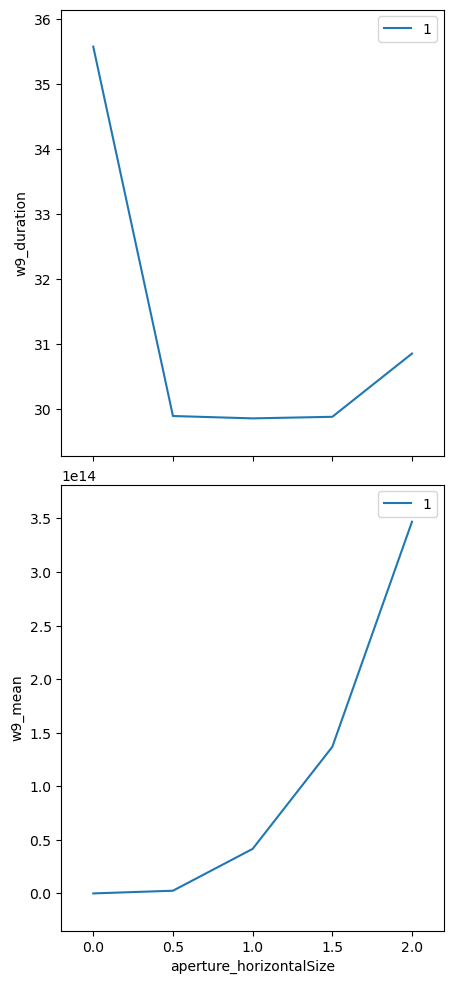

In [1]:
%run -i ../../../examples/prepare_det_env.py

from sirepo_bluesky.sirepo_bluesky import SirepoBluesky
from sirepo_bluesky.sirepo_ophyd import create_classes

connection = SirepoBluesky("http://localhost:8000")

data, schema = connection.auth("srw", "00000002")
classes, objects = create_classes(connection.data,
                                  connection=connection)
globals().update(**objects)

aperture.horizontalSize.kind = "hinted"
w9.duration.kind = "hinted"

(uid,) = RE(bp.scan([w9], aperture.horizontalSize, 0, 2, 5))

hdr = db[uid]
tbl = hdr.table(fill=True)
print(tbl)

w9_image = np.array(list(hdr.data("w9_image")))

Data shape: (5, 42, 960)


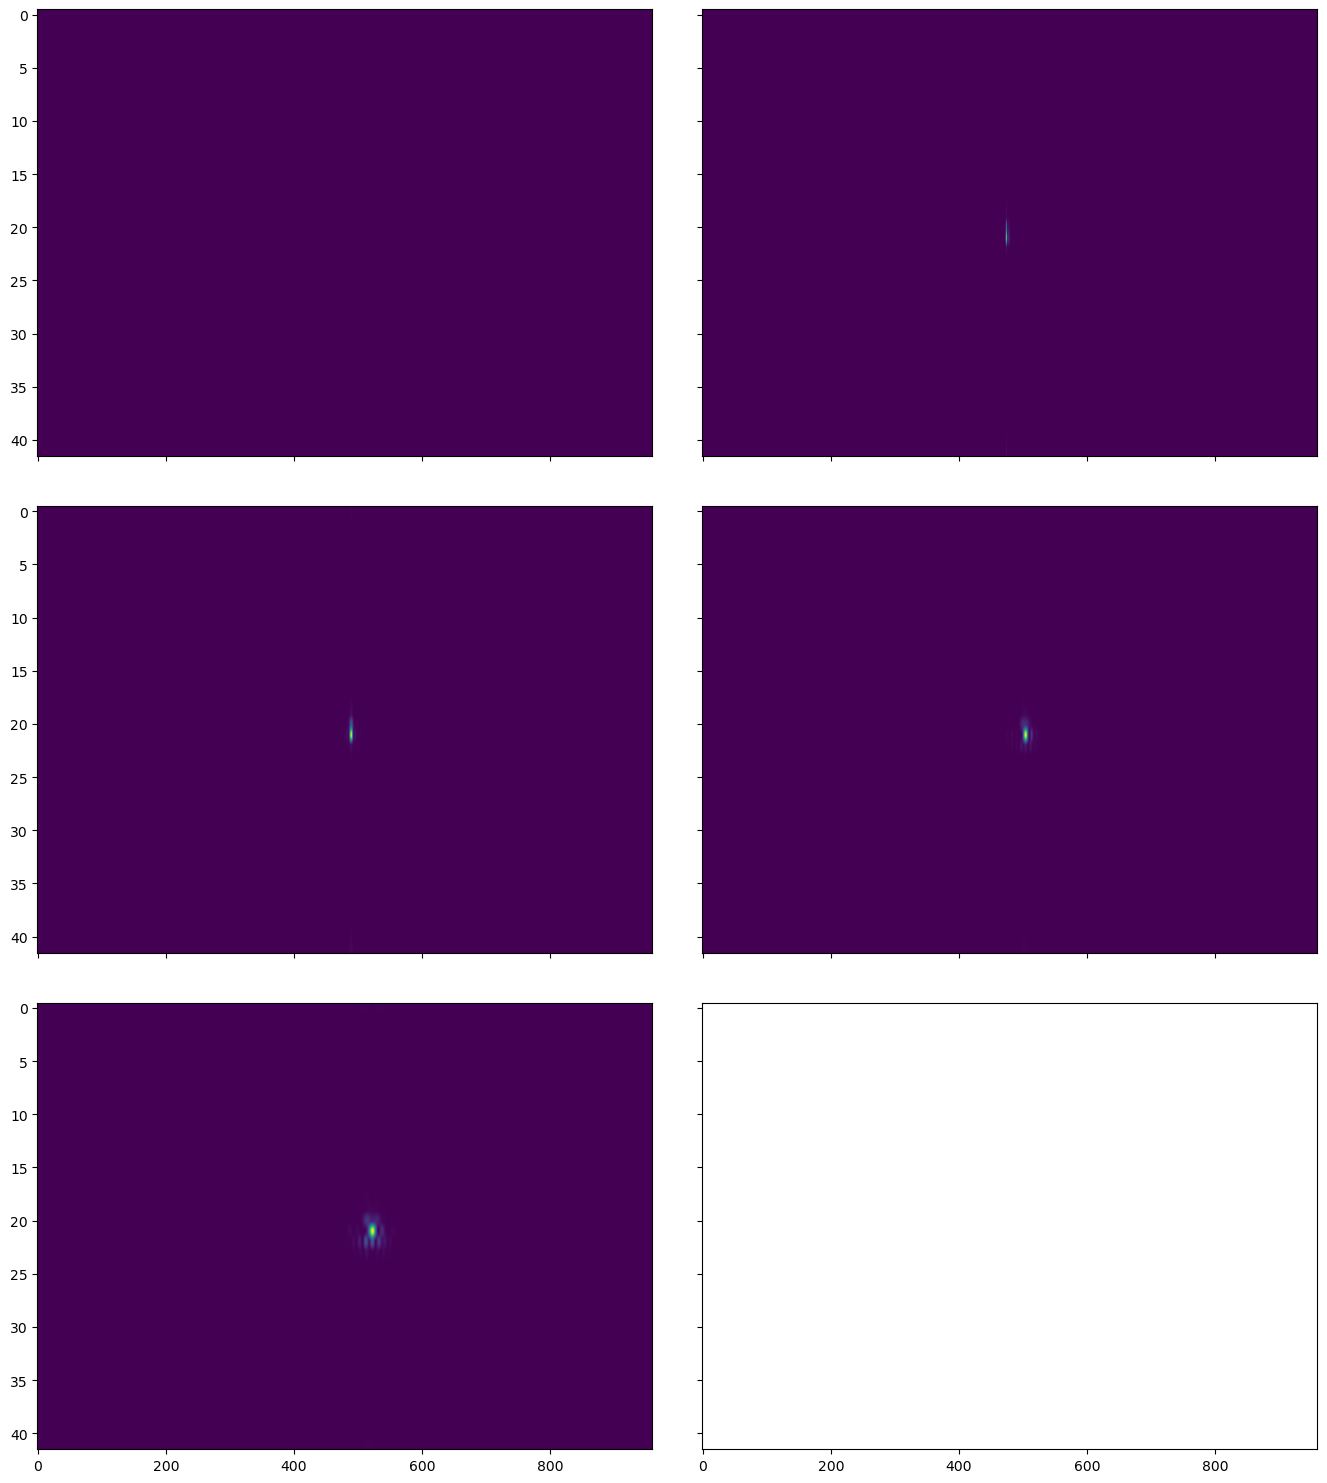

In [2]:
from mpl_toolkits.axes_grid1 import ImageGrid

print(f"Data shape: {w9_image.shape}")
num_frames = w9_image.shape[0]
ncols = 2
nrows = int(np.ceil(num_frames / ncols))

fig = plt.figure()
grid = ImageGrid(fig, (1, 2, ncols, nrows),
                 nrows_ncols=(nrows, ncols),
                 axes_pad=0.5,
                 aspect=False)

for ax, im in zip(grid, w9_image[:, ...]):
    ax.imshow(im, aspect="auto")

## Run "Beam Statistics" Sirepo/Shadow app simulations

In this example, we scan the toroidal mirror's radius and collect the results of the "Beam Statistics" report on the "Beamline" page of Sirepo/Shadow app. At the end of the execution, we provide the timing report for these simulations.



Transient Scan ID: 1     Time: 2022-09-08 17:33:29
Persistent Unique Scan ID: '217f4269-bb7e-473a-bc80-4fdd1558804b'


New stream: 'primary'
+-----------+------------+--------------+--------------+
|   seq_num |       time | toroid_r_maj | bsr_duration |
+-----------+------------+--------------+--------------+
|         1 | 17:33:36.1 |    10000.000 |        6.244 |


|         2 | 17:33:41.4 |    12000.000 |        5.176 |


|         3 | 17:33:46.6 |    14000.000 |        5.189 |


|         4 | 17:33:51.9 |    16000.000 |        5.179 |


|         5 | 17:33:57.1 |    18000.000 |        5.185 |


|         6 | 17:34:02.4 |    20000.000 |        5.189 |


|         7 | 17:34:07.6 |    22000.000 |        5.184 |


|         8 | 17:34:12.9 |    24000.000 |        5.174 |


|         9 | 17:34:18.1 |    26000.000 |        5.168 |


|        10 | 17:34:23.4 |    28000.000 |        5.173 |


|        11 | 17:34:28.7 |    30000.000 |        5.214 |


|        12 | 17:34:33.9 |    32000.000 |        5.204 |


|        13 | 17:34:39.2 |    34000.000 |        5.165 |


|        14 | 17:34:44.4 |    36000.000 |        5.180 |


|        15 | 17:34:49.7 |    38000.000 |        5.183 |


|        16 | 17:34:54.9 |    40000.000 |        5.192 |


|        17 | 17:35:00.2 |    42000.000 |        5.164 |


|        18 | 17:35:05.4 |    44000.000 |        5.175 |


|        19 | 17:35:10.7 |    46000.000 |        5.165 |


|        20 | 17:35:15.9 |    48000.000 |        5.203 |


|        21 | 17:35:21.2 |    50000.000 |        5.166 |
+-----------+------------+--------------+--------------+
generator scan ['217f4269'] (scan num: 1)





                                 time  \
seq_num                                 
1       2022-09-08 17:33:36.127503871   
2       2022-09-08 17:33:41.407044888   
3       2022-09-08 17:33:46.675197363   
4       2022-09-08 17:33:51.920640945   
5       2022-09-08 17:33:57.176105738   
6       2022-09-08 17:34:02.432873487   
7       2022-09-08 17:34:07.684773207   
8       2022-09-08 17:34:12.928495407   
9       2022-09-08 17:34:18.165989876   
10      2022-09-08 17:34:23.413055658   
11      2022-09-08 17:34:28.702540874   
12      2022-09-08 17:34:33.976504803   
13      2022-09-08 17:34:39.223343611   
14      2022-09-08 17:34:44.471280813   
15      2022-09-08 17:34:49.723624945   
16      2022-09-08 17:34:54.986444950   
17      2022-09-08 17:35:00.220463037   
18      2022-09-08 17:35:05.467872143   
19      2022-09-08 17:35:10.701967716   
20      2022-09-08 17:35:15.981078863   
21      2022-09-08 17:35:21.214163303   

                                      bsr_sirepo_data_js

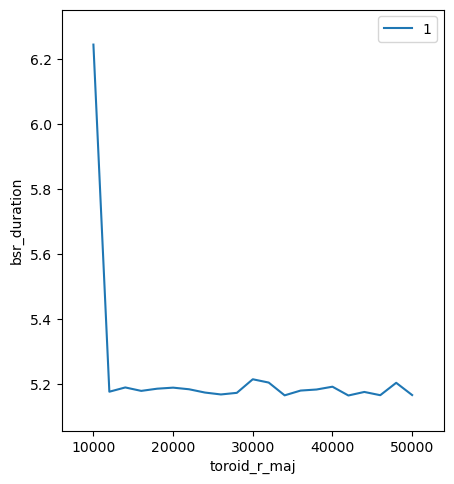

In [3]:
%run -i ../../../examples/prepare_det_env.py

from sirepo_bluesky.sirepo_bluesky import SirepoBluesky
from sirepo_bluesky.sirepo_ophyd import BeamStatisticsReport, create_classes

connection = SirepoBluesky("http://localhost:8000")

data, schema = connection.auth("shadow", "00000002")

classes, objects = create_classes(connection.data,
                                  connection=connection)
globals().update(**objects)

bsr = BeamStatisticsReport(name="bsr", connection=connection)

toroid.r_maj.kind = "hinted"
bsr.duration.kind = "hinted"

scan_range = (10_000, 50_000, 21)

(uid,) = RE(bp.scan([bsr], toroid.r_maj, *scan_range))

hdr = db[uid]
tbl = hdr.table()
print(tbl)

/tmp/ipykernel_5731/1375322784.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(16, 4))


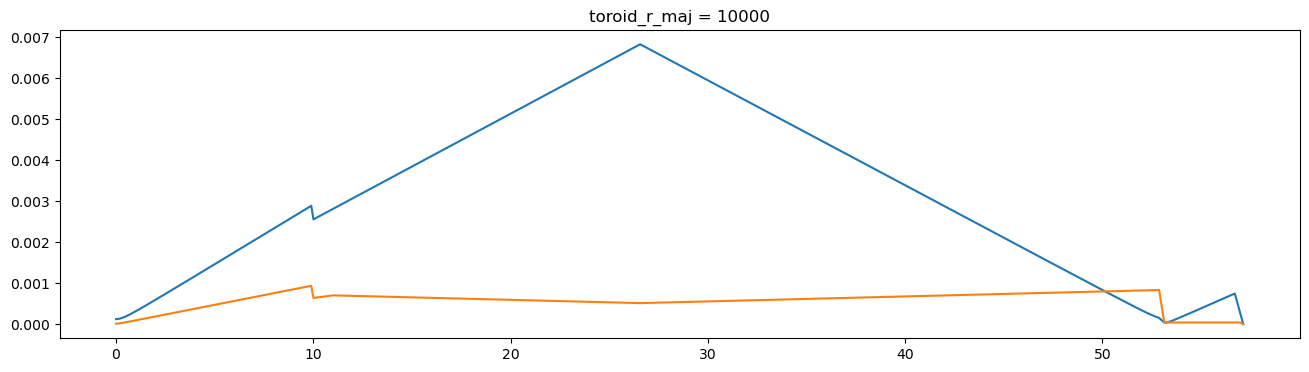

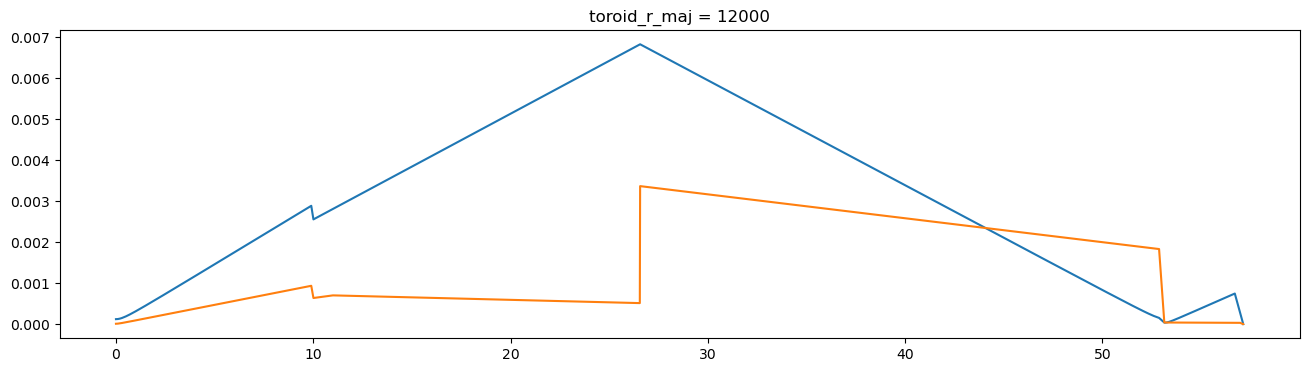

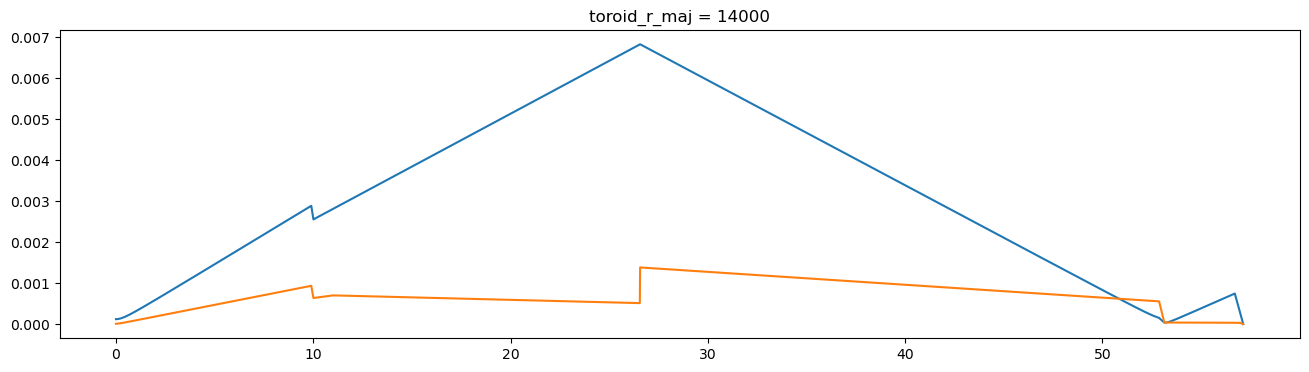

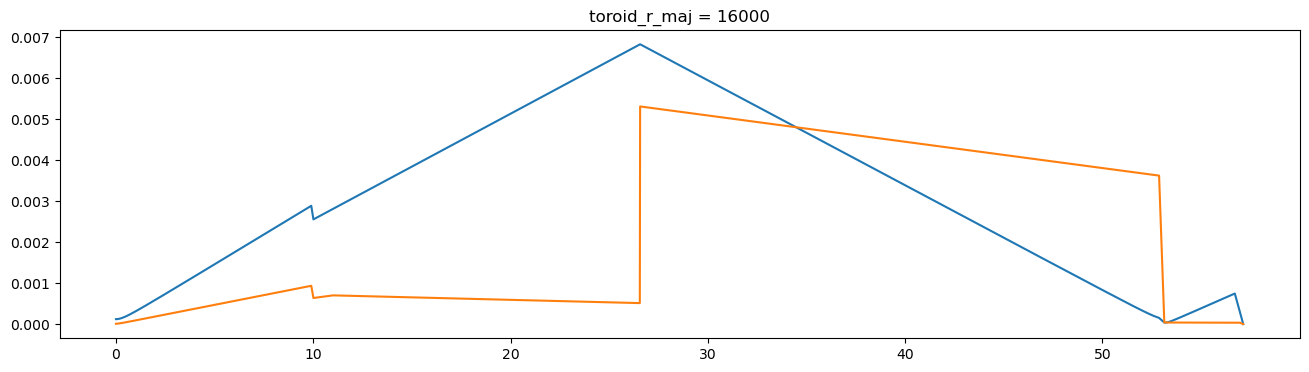

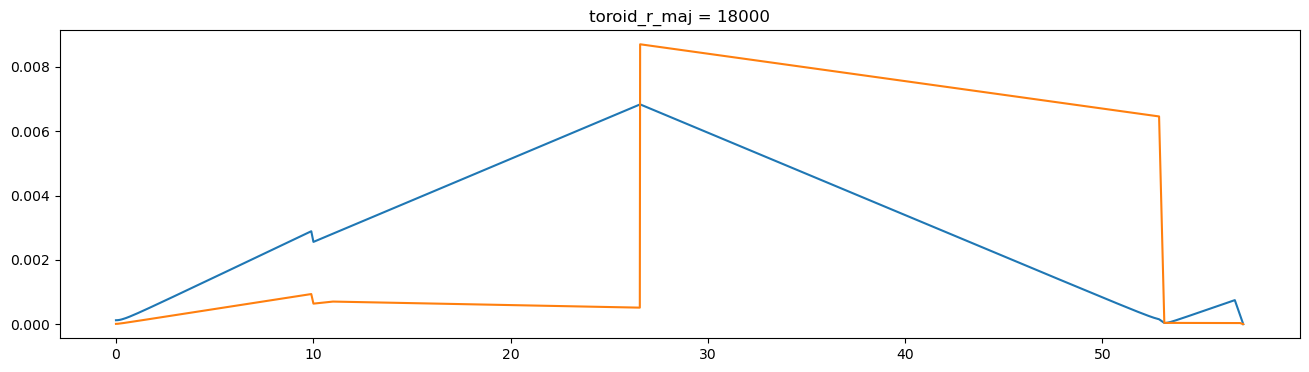

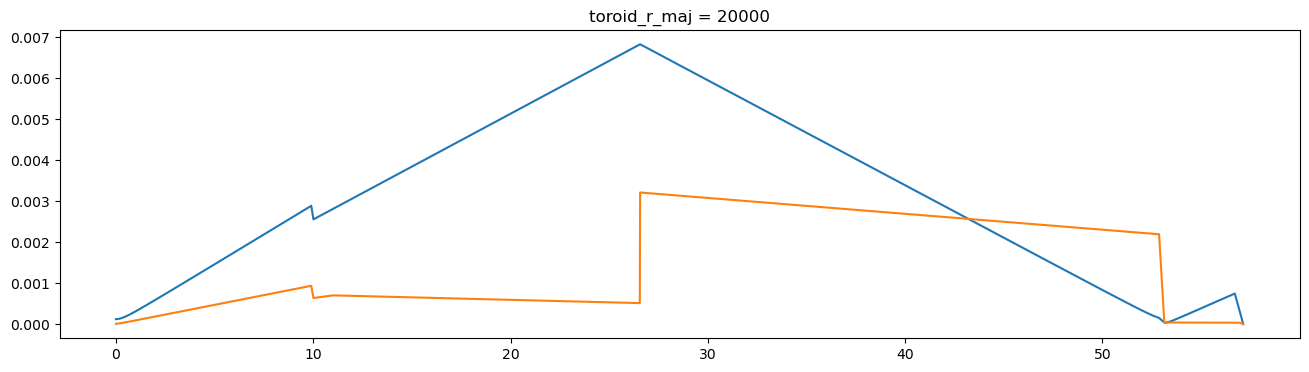

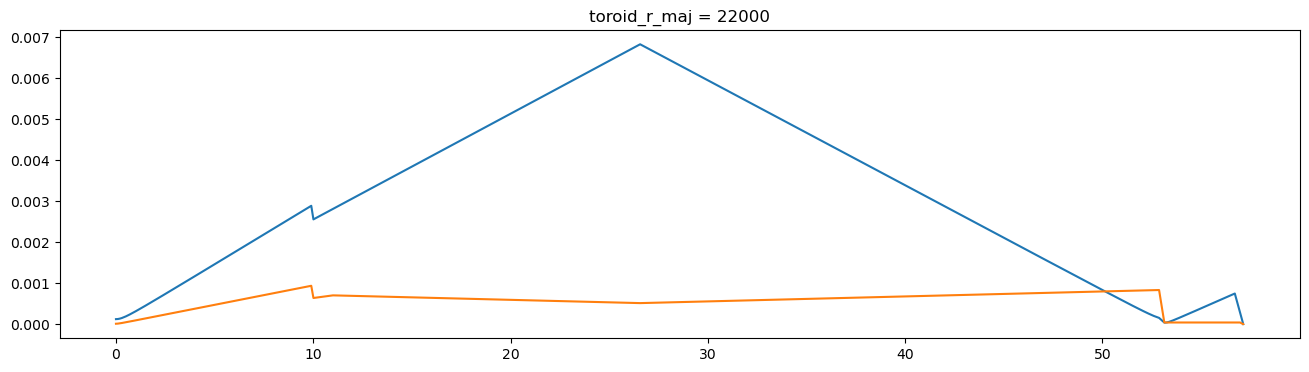

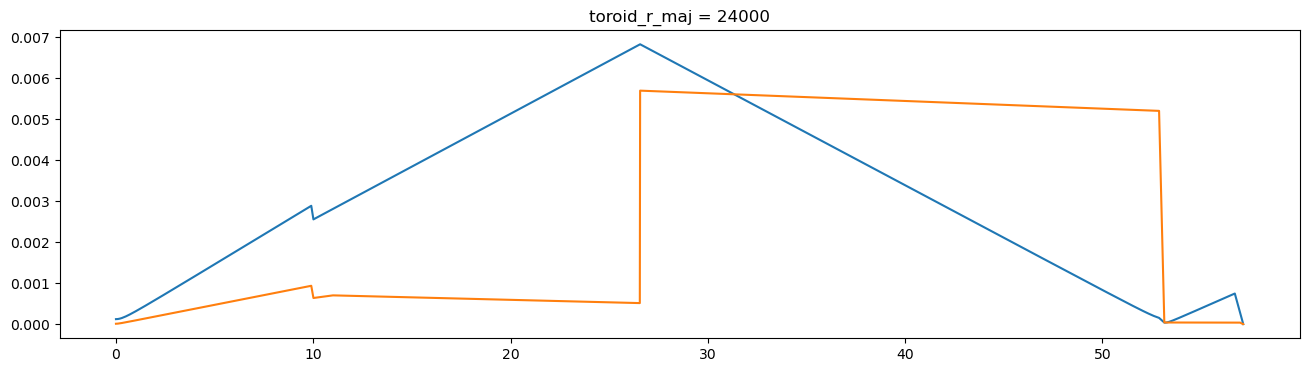

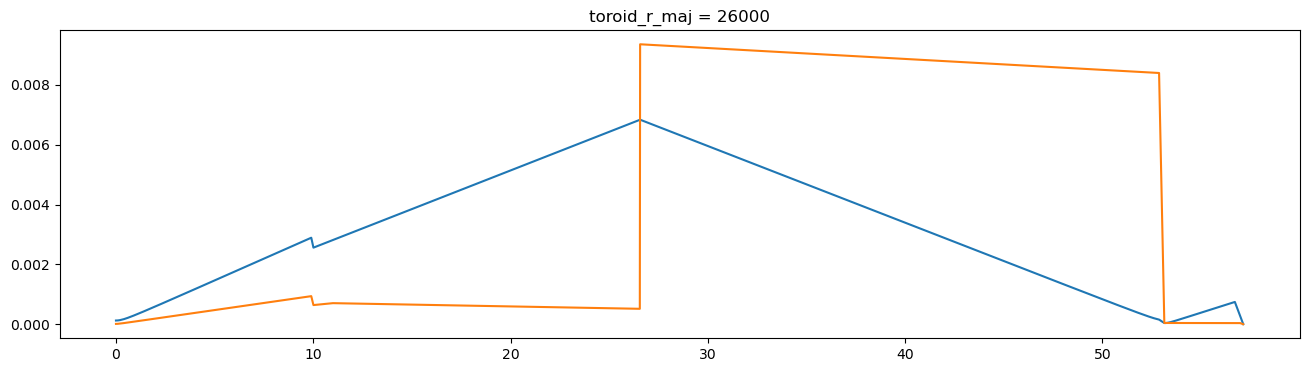

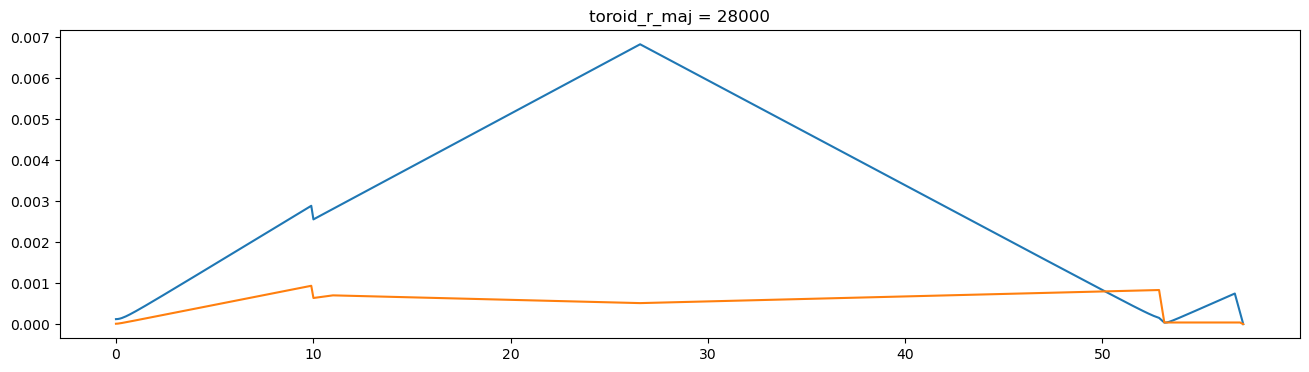

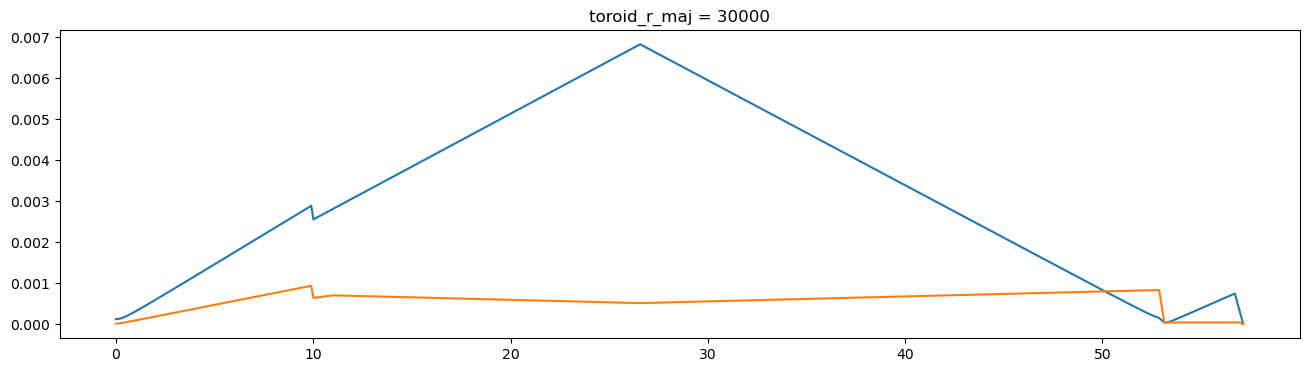

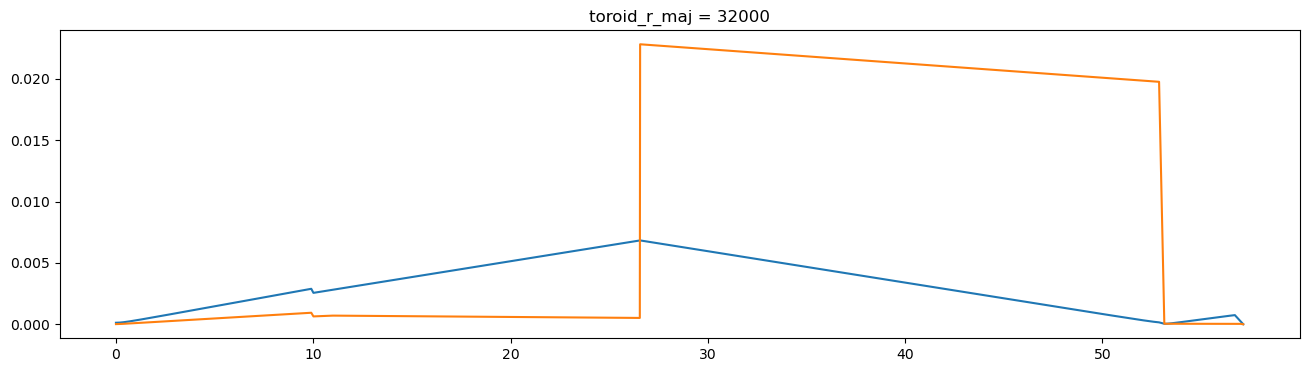

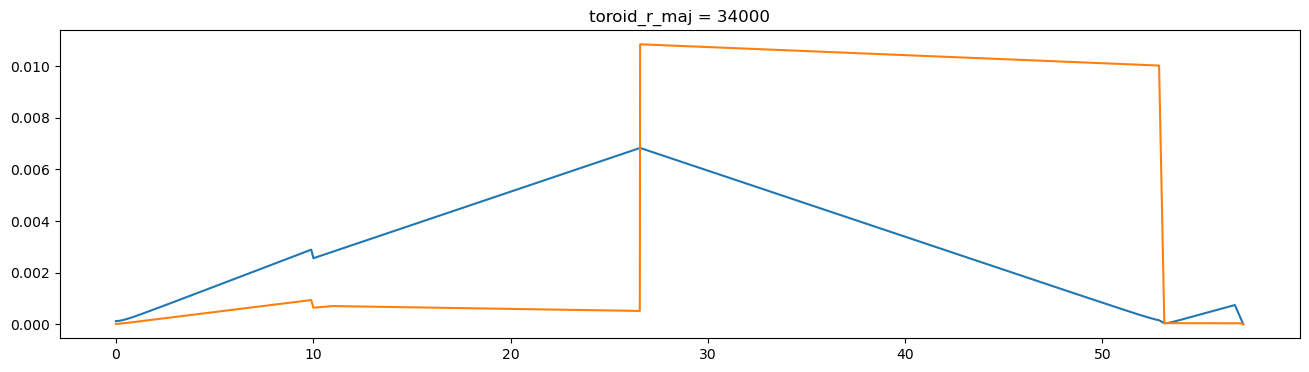

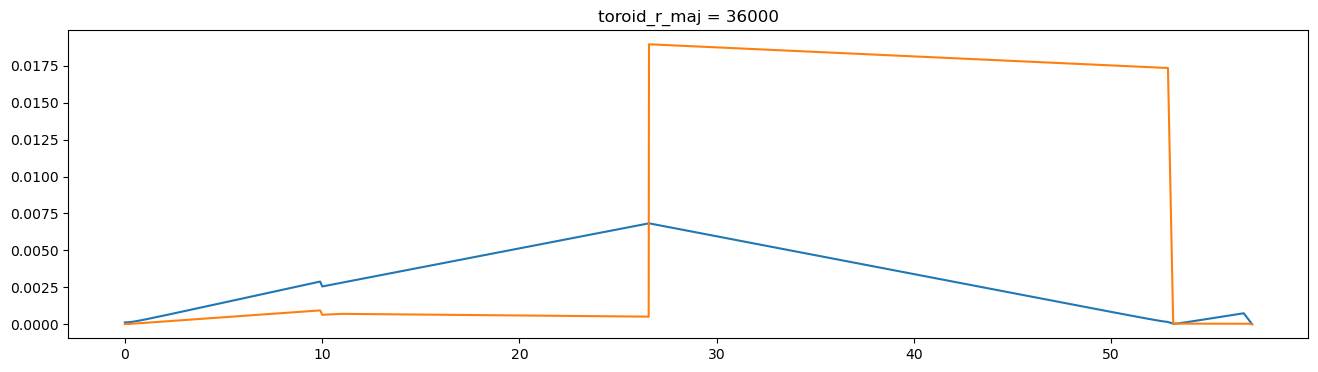

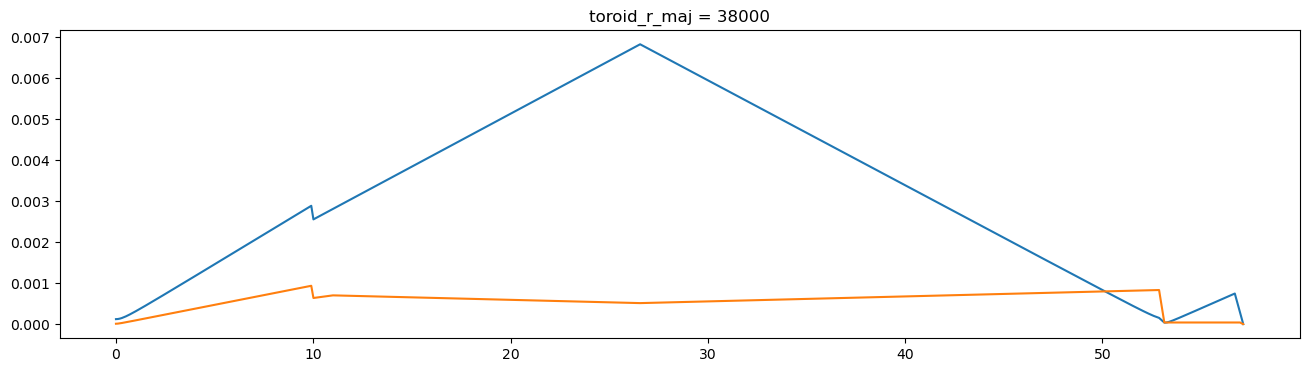

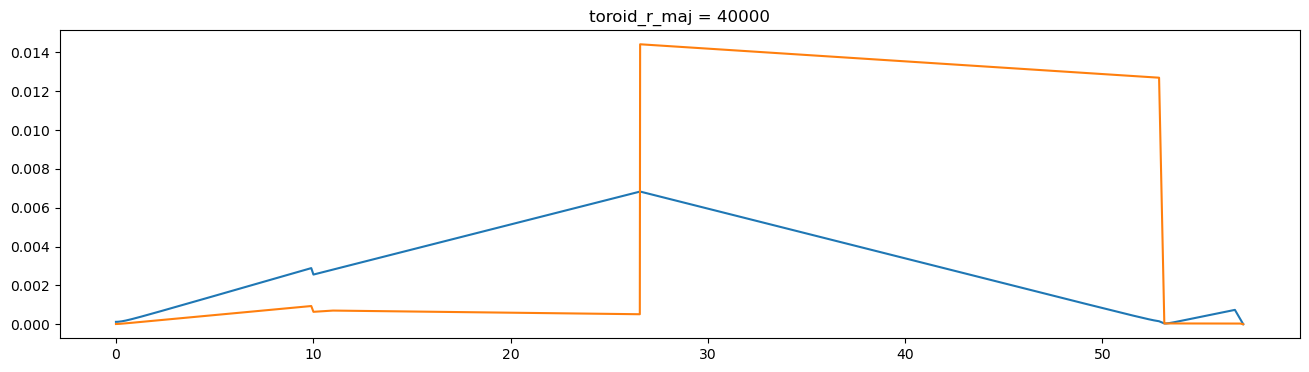

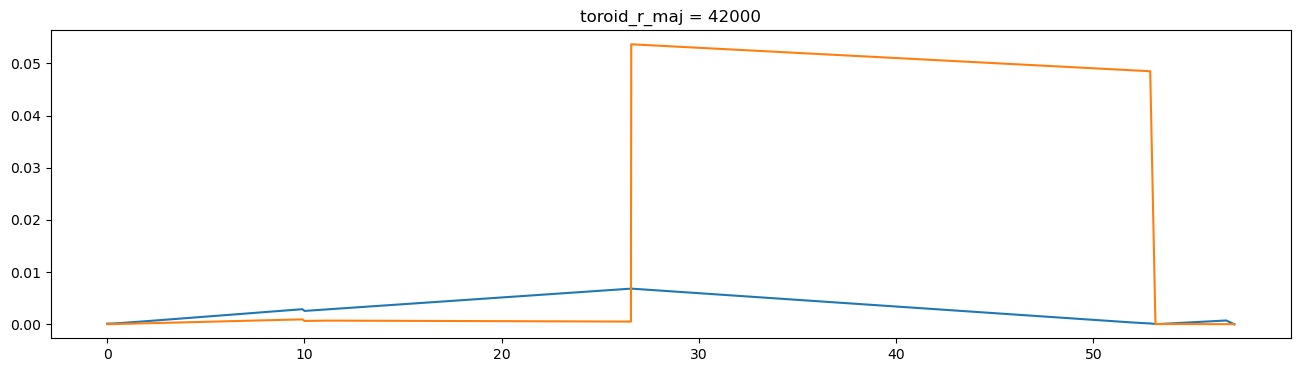

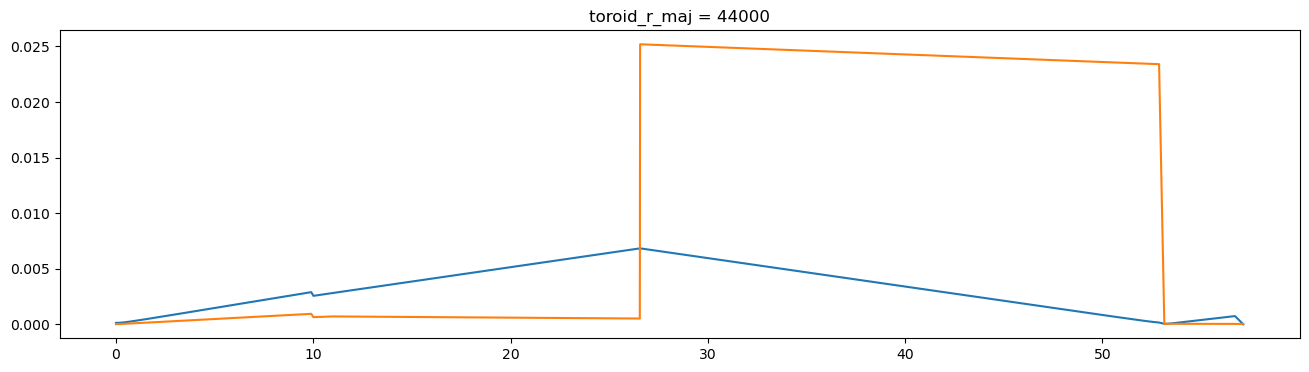

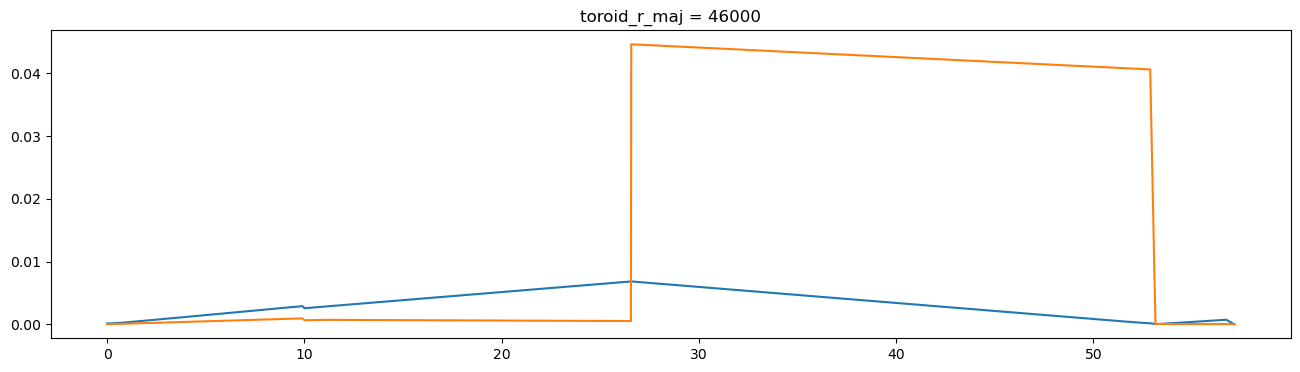

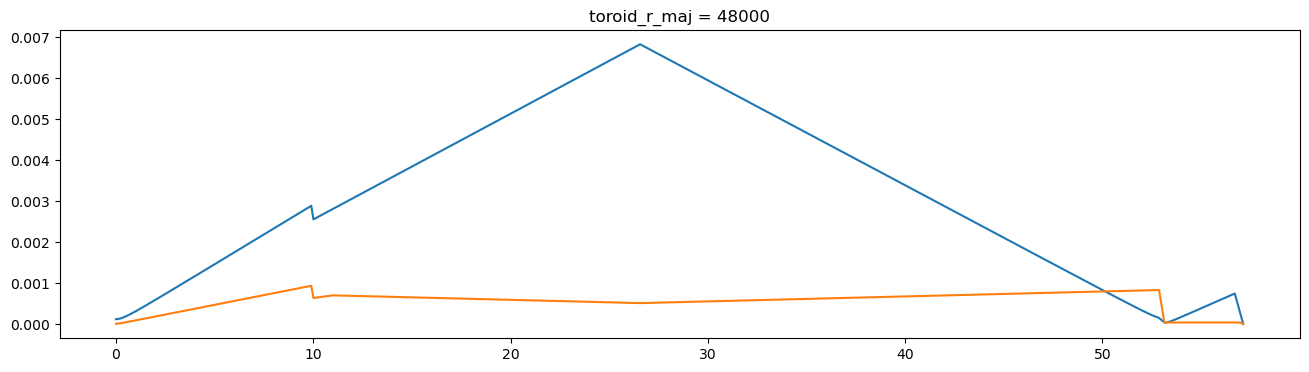

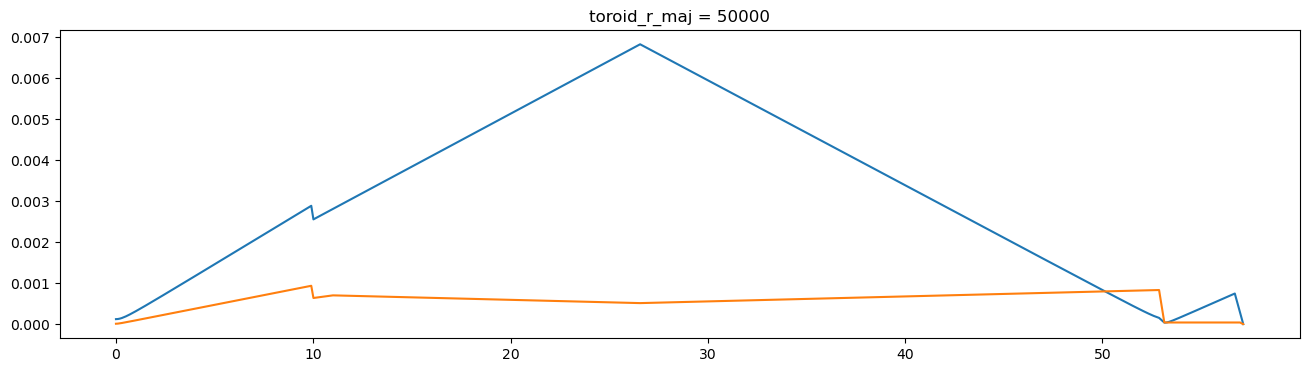

In [4]:
import json
import matplotlib.pyplot as plt

for idx in range(1, tbl["toroid_r_maj"].size + 1):
    d = json.loads(tbl["bsr_report"][idx])
    plt.figure(figsize=(16, 4))
    plt.plot(d["s"], d["sigmax"])
    plt.plot(d["s"], d["sigmaz"])
    plt.title(f"toroid_r_maj = {tbl['toroid_r_maj'][idx]:.0f}")

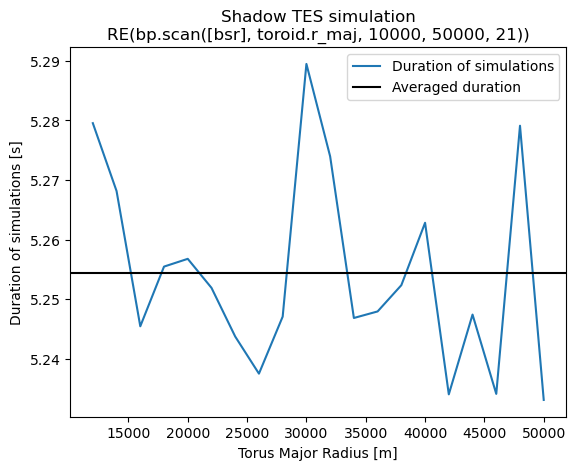

In [5]:
data = np.array(tbl["time"].diff(), dtype=float)[1:] / 1e9

fig = plt.figure()
ax = fig.add_subplot()
ax.plot(np.linspace(*scan_range)[1:], data, label="Duration of simulations")
ax.set_ylabel("Duration of simulations [s]")
ax.set_xlabel("Torus Major Radius [m]")
ax.axhline(data.mean(), color="k", label="Averaged duration")
ax.legend()
title = (
    f"Shadow TES simulation\n"
    f"RE(bp.scan([bsr], toroid.r_maj, "
    f"{', '.join([str(x) for x in scan_range])}))"
)
ax.set_title(title)
plt.show()